In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,'/Users/user/Documents/MeerFish')
import cosmo
import model
import fisher
import survey

## Survey choice: 

Either chose a pre-defined survey as is being done here. Default is full MeerKLASS UHF band.

Here we assign two surveys 'MK-UHF' (full MeerKLASS) and 'DESI-ELG' (DESI ELG sample). If one is selected all _2 and _X parameters are ignored in later code.

Alternatively, manually amend these parameters for any hypothetical survey.

In [2]:
### Survey parameters:
Survey1 = 'MK_UHF'
Survey2 = 'DESI-ELG'
z,zmin1,zmin2,zmax1,zmax2,A_sky1,A_sky2,V_bin1,V_bin2,V_binX,theta_FWHM1,theta_FWHM2,t_tot,N_dish,sigma_z1,sigma_z2,P_N,nbar = survey.params(Survey1=Survey1,Survey2=Survey2)
surveypars = z,V_bin1,V_bin2,V_binX,theta_FWHM1,theta_FWHM2,sigma_z1,sigma_z2,P_N,1/nbar

By default, the survey.params() module assumes a maximum overlap given the redshift range and areas of the survey. This can be tweaked using **A_skyX** to reduce the area overlap, as is the case for MeerKLASS and DESI.

In [3]:
print('Survey 1 volume [(Mpc/h)^3]:',V_bin1)
print('Survey 2 volume [(Mpc/h)^3]:',V_bin2)
print('Overlap volume  [(Mpc/h)^3]:',V_binX)
print('--------')

A_skyX = 4000 # overlapping area between two surveys
z,zmin1,zmin2,zmax1,zmax2,A_sky1,A_sky2,V_bin1,V_bin2,V_binX,theta_FWHM1,theta_FWHM2,t_tot,N_dish,sigma_z1,sigma_z2,P_N,nbar = survey.params(Survey1=Survey1,Survey2=Survey2,A_skyX=A_skyX)
print('Survey 1 volume [(Mpc/h)^3]:',V_bin1)
print('Survey 2 volume [(Mpc/h)^3]:',V_bin2)
print('Overlap volume  [(Mpc/h)^3]:',V_binX)

Survey 1 volume [(Mpc/h)^3]: 37037668029.869125
Survey 2 volume [(Mpc/h)^3]: 38179931474.24731
Overlap volume  [(Mpc/h)^3]: 25453287649.498203
--------
Survey 1 volume [(Mpc/h)^3]: 37037668029.869125
Survey 2 volume [(Mpc/h)^3]: 38179931474.24731
Overlap volume  [(Mpc/h)^3]: 10181315059.79928


## Cosmology and $k$-bins:

Define cosmology which returns an array of cosmological parameters which can be unpacked as shown, and tweaked to user specification.

Also define the k-bins which can be done automatically given the defined survey limits, or manually tweaked.

In [4]:
### Cosmological parameters:
cosmopars = cosmo.SetCosmology(z=z,return_cosmopars=True)
Tbar1,Tbar2,b1,b2,bphi1,bphi2,f_,a_perp,a_para,A_BAO,f_NL = cosmopars
Pmod = cosmo.MatterPk(z)

### k-bins:
k,kbins,kmin,kmax = model.get_kbins(z,zmin1,zmax1,A_sky1)

## Chose which parameters to forecast:

Here the parameters that are fed to the Fisher forecast can be chosen. The full list of currently available parameters is given and those not needed can be commented out.

$b_1$$=1.55\pm0.00346$
$b_2$$=2.10\pm0.00278$
$f$$=0.891\pm0.00458$
$\alpha_\perp$$=1.00\pm0.000619$
$\alpha_\parallel$$=1.00\pm0.00210$
$f_{\rm NL}$$=0.00\pm7.24$


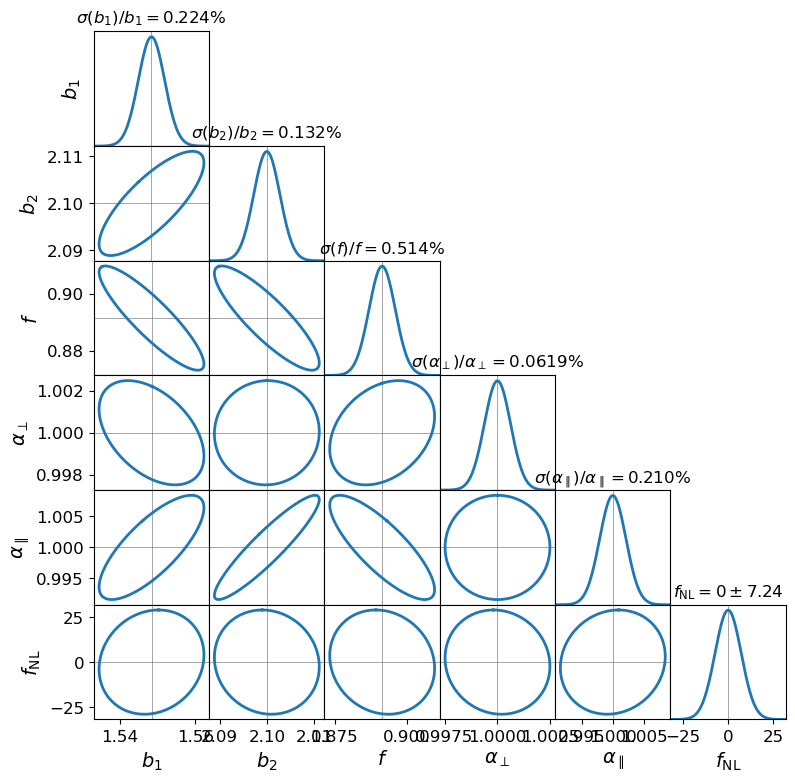

In [5]:
### Parameter selection:
theta_ids = [\
#r'$\overline{T}_{\rm HI}$',\
r'$b_1$',\
r'$b_2$',\
#r'$b^\phi_1$',\
#r'$b^\phi_2$',\
r'$f$',\
r'$\alpha_\perp$',\
r'$\alpha_\parallel$',\
#r'$A_{\rm BAO}$',\
r'$f_{\rm NL}$'\
]

ells = [0,2,4] # which power spectrum multipoles to include in forecast
tracer = 'MT' # Can chose '1' or '2' for individual tracer for Survey 1 or 2, or 'X' for just cross-correlation
F = fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells=ells,tracer=tracer)

fontsize = 12
theta = model.get_param_vals(theta_ids,z,cosmopars) # get fiducial values for all chosen parameters
fisher.CornerPlot(F,theta,theta_ids,fontsize=fontsize)
plt.show()